In [1]:
import pandas as pd
import seaborn as sns

In [2]:
column_names = [
  '사용월',
  '호선명',
  '지하철역',
  '04시-05시 승차인원',
  '04시-05시 하차인원',
  '05시-06시 승차인원',
  '05시-06시 하차인원',
  '06시-07시 승차인원',
  '06시-07시 하차인원',
  '07시-08시 승차인원',
  '07시-08시 하차인원',
  '08시-09시 승차인원',
  '08시-09시 하차인원',
  '09시-10시 승차인원',
  '09시-10시 하차인원',
  '10시-11시 승차인원',
  '10시-11시 하차인원',
  '11시-12시 승차인원',
  '11시-12시 하차인원',
  '12시-13시 승차인원',
  '12시-13시 하차인원',
  '13시-14시 승차인원',
  '13시-14시 하차인원',
  '14시-15시 승차인원',
  '14시-15시 하차인원',
  '15시-16시 승차인원',
  '15시-16시 하차인원',
  '16시-17시 승차인원',
  '16시-17시 하차인원',
  '17시-18시 승차인원',
  '17시-18시 하차인원',
  '18시-19시 승차인원',
  '18시-19시 하차인원',
  '19시-20시 승차인원',
  '19시-20시 하차인원',
  '20시-21시 승차인원',
  '20시-21시 하차인원',
  '21시-22시 승차인원',
  '21시-22시 하차인원',
  '22시-23시 승차인원',
  '22시-23시 하차인원',
  '23시-24시 승차인원',
  '23시-24시 하차인원',
  '00시-01시 승차인원',
  '00시-01시 하차인원',
  '01시-02시 승차인원',
  '01시-02시 하차인원',
  '02시-03시 승차인원',
  '02시-03시 하차인원',
  '03시-04시 승차인원',
  '03시-04시 하차인원',
]
dataset_path = './dataset/subway.csv'

In [3]:
raw_dataset = pd.read_csv(dataset_path, na_values='?', comment='\t', sep=',', skipinitialspace=True, encoding='cp949')

In [79]:
dataset = raw_dataset.copy()
dataset.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202104,1호선,동대문,635,9,12446,1948,8958,7019,14035,...,8304,14,1286,1,2,0,0,0,0,20210503
1,202104,1호선,동묘앞,57,3,2966,885,3409,4736,5917,...,2344,3,1198,0,0,0,0,0,0,20210503
2,202104,1호선,서울역,746,16,9151,6038,11560,33958,36079,...,7638,13,570,0,0,0,0,0,0,20210503
3,202104,1호선,시청,29,0,1711,3796,2774,19145,6323,...,1308,5,86,0,0,0,0,0,0,20210503
4,202104,1호선,신설동,270,10,8305,3003,7977,10434,17091,...,5136,9,294,0,0,0,0,0,0,20210503


In [5]:
dataset.isna().sum()

사용월             0
호선명             0
지하철역            0
04시-05시 승차인원    0
04시-05시 하차인원    0
05시-06시 승차인원    0
05시-06시 하차인원    0
06시-07시 승차인원    0
06시-07시 하차인원    0
07시-08시 승차인원    0
07시-08시 하차인원    0
08시-09시 승차인원    0
08시-09시 하차인원    0
09시-10시 승차인원    0
09시-10시 하차인원    0
10시-11시 승차인원    0
10시-11시 하차인원    0
11시-12시 승차인원    0
11시-12시 하차인원    0
12시-13시 승차인원    0
12시-13시 하차인원    0
13시-14시 승차인원    0
13시-14시 하차인원    0
14시-15시 승차인원    0
14시-15시 하차인원    0
15시-16시 승차인원    0
15시-16시 하차인원    0
16시-17시 승차인원    0
16시-17시 하차인원    0
17시-18시 승차인원    0
17시-18시 하차인원    0
18시-19시 승차인원    0
18시-19시 하차인원    0
19시-20시 승차인원    0
19시-20시 하차인원    0
20시-21시 승차인원    0
20시-21시 하차인원    0
21시-22시 승차인원    0
21시-22시 하차인원    0
22시-23시 승차인원    0
22시-23시 하차인원    0
23시-24시 승차인원    0
23시-24시 하차인원    0
00시-01시 승차인원    0
00시-01시 하차인원    0
01시-02시 승차인원    0
01시-02시 하차인원    0
02시-03시 승차인원    0
02시-03시 하차인원    0
03시-04시 승차인원    0
03시-04시 하차인원    0
작업일자            0
dtype: int64

In [6]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [7]:
sns.set(
    font='Malgun Gothic',
    rc={ 'axes.unicode_minus': False },
    style='darkgrid'
)

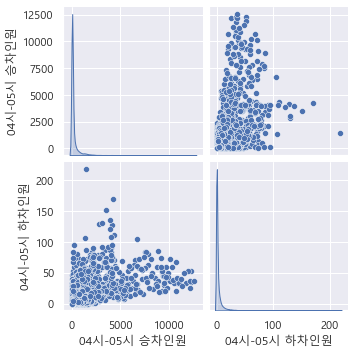

In [8]:
sns.pairplot(
    train_dataset[[
        '04시-05시 승차인원',
        '04시-05시 하차인원',
    ]],
    diag_kind='kde'
)

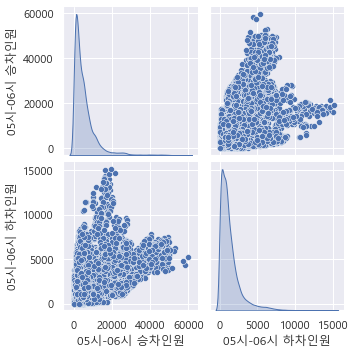

In [9]:
sns.pairplot(
    train_dataset[[
        '05시-06시 승차인원',
        '05시-06시 하차인원',
    ]],
    diag_kind='kde'
)

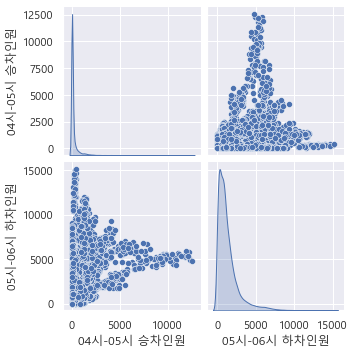

In [13]:
sns.pairplot(
    train_dataset[[
        '04시-05시 승차인원',
        '05시-06시 하차인원',
    ]],
    diag_kind='kde'
)

In [ ]:
import tensorflow as tf
import numpy  as np

In [ ]:
_arr = dataset[column_names].to_numpy()
station = {}

for i in _arr:
    s = i[2]
    if list(station.keys()).count(s) == 0:  station[s] = [[], []]
    data = i[3:]
    ride = []
    quit = []
    for j in range(len(data)):
        if j % 2 == 0:
            ride.append(data[j])
            continue
        quit.append(data[j])
    station[s][0].append(ride)
    station[s][1].append(quit)

In [ ]:
import matplotlib.pyplot as plt

def findByStation(__station):
    if list(station.keys()).count(__station) == 0:
        return "해당 역의 데이터를 조회할 수 없습니다."
    new = station[__station]
    return new

__station = input()
result = findByStation(__station)


plt.rc('font', family='Malgun Gothic')
plt.title(f'{__station}의 시간대별 승·하차 인원 수')
plt.plot(result[0][0], color='r', label='승차 인원')
plt.plot(result[1][0], color='b', label='하차 인원')

for i in range(1, len(result[0])):
    plt.plot(result[0][j], color='r')
    plt.plot(result[1][j], color='b')

plt.xlabel('시간대')
plt.ylabel('인원 수')
plt.legend()
plt.show()


plt.title(f'{__station}의 승·하차 분포')

for i in range(len(result[0])):
    plt.plot(result[0][i], result[1][i], 'ro')
    
plt.xlabel('승차 인원')
plt.ylabel('하차 인원')
plt.show()